In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv("./expandedLexicon.tsv",sep='\t')
df

,term,score
0,horrible_noun,3.679601
1,disgusting_adj,3.493682
2,moron_noun,3.469677
3,bastard_noun,3.399238
4,stupid_noun,3.323882
...,...,...
8473,recourse_noun,-4.170819
8474,tension_verb,-4.351016
8475,tension_noun,-4.408596
8476,doubt_noun,-5.126174


In [ ]:
newdf = df.drop(df[df['score'] < 0].index)
newdf

,term,score
0,horrible_noun,3.679601
1,disgusting_adj,3.493682
2,moron_noun,3.469677
3,bastard_noun,3.399238
4,stupid_noun,3.323882
...,...,...
2984,minus_adj,0.004749
2985,sourish_adj,0.004126
2986,rambling_noun,0.002261
2987,scorching_noun,0.000564


In [ ]:
terms = df['term'].str.split('_').str[0]
newdf['term'] = terms
terms


0         horrible
1       disgusting
2            moron
3          bastard
4           stupid
           ...    
8473      recourse
8474       tension
8475       tension
8476         doubt
8477         doubt
Name: term, Length: 8478, dtype: object

In [ ]:
scores = df['score']
newdf

,term,score
0,horrible,3.679601
1,disgusting,3.493682
2,moron,3.469677
3,bastard,3.399238
4,stupid,3.323882
...,...,...
2984,minus,0.004749
2985,sourish,0.004126
2986,rambling,0.002261
2987,scorching,0.000564


In [ ]:
newDict = newdf.set_index('term').to_dict()['score']
newDict

{'horrible': 3.1827809,
 'disgusting': 3.4936825,
 'moron': 3.4696771,
 'bastard': 2.9925045,
 'stupid': 3.1918846,
 'bitch': 2.5479306,
 'scumbag': 3.1949177,
 'ass': 3.0799801,
 'idiot': 3.0301171,
 'slut': 2.4950545,
 'vile': 2.8624451,
 'redneck': 2.8006986,
 'filth': 2.7742084,
 'cretin': 2.7070032,
 'sadist': 2.6944803,
 'crap': 2.2912594,
 'sociopath': 2.6348441,
 'arent': 2.5915894,
 'stink': 2.386318,
 'revolting': 2.0877126,
 'rotten': 2.5617882,
 'bigot': 2.5544108,
 'brat': 2.5388335,
 'scum': 1.9286376,
 'crappy': 2.5225451,
 'stinky': 2.5190451,
 'rubbish': 2.1084307,
 'fuck': 2.2390389,
 'liar': 2.4938713,
 'filthy': 2.4713835,
 'nerd': 2.4511875,
 'hypocrite': 2.4136389,
 'nutcase': 2.401145,
 'whore': 1.6661232,
 'stinking': 2.0073536,
 'lout': 2.3866137,
 'wanker': 2.3574416,
 'dolt': 2.3368959,
 'hideous': 2.3248801,
 'shit': 1.827128,
 'lunatic': 1.8776539,
 'pest': 2.3117798,
 'snot': 1.9340294,
 'egomaniac': 2.3009798,
 'perverted': 2.2945354,
 'twat': 1.8617624,


In [ ]:
tweetdf = pd.read_csv("./hatespeech.csv")
tweetdf

,class,tweet
0,False,!!! RT @mayasolovely: As a woman you shouldn't...
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,False,"you've gone and broke the wrong heart baby, an..."
24780,True,young buck wanna eat!!.. dat nigguh like I ain...
24781,True,youu got wild bitches tellin you lies


In [ ]:
tweets = tweetdf['tweet'].values
tweets = [a.split() for a in tweets]
tweets

[['!!!',
  'RT',
  '@mayasolovely:',
  'As',
  'a',
  'woman',
  'you',
  "shouldn't",
  'complain',
  'about',
  'cleaning',
  'up',
  'your',
  'house.',
  '&amp;',
  'as',
  'a',
  'man',
  'you',
  'should',
  'always',
  'take',
  'the',
  'trash',
  'out...'],
 ['!!!!!',
  'RT',
  '@mleew17:',
  'boy',
  'dats',
  'cold...tyga',
  'dwn',
  'bad',
  'for',
  'cuffin',
  'dat',
  'hoe',
  'in',
  'the',
  '1st',
  'place!!'],
 ['!!!!!!!',
  'RT',
  '@UrKindOfBrand',
  'Dawg!!!!',
  'RT',
  '@80sbaby4life:',
  'You',
  'ever',
  'fuck',
  'a',
  'bitch',
  'and',
  'she',
  'start',
  'to',
  'cry?',
  'You',
  'be',
  'confused',
  'as',
  'shit'],
 ['!!!!!!!!!',
  'RT',
  '@C_G_Anderson:',
  '@viva_based',
  'she',
  'look',
  'like',
  'a',
  'tranny'],
 ['!!!!!!!!!!!!!',
  'RT',
  '@ShenikaRoberts:',
  'The',
  'shit',
  'you',
  'hear',
  'about',
  'me',
  'might',
  'be',
  'true',
  'or',
  'it',
  'might',
  'be',
  'faker',
  'than',
  'the',
  'bitch',
  'who',
  'told',


In [ ]:
def calculate_sentiment(tokens):
    score = 0
    for token in tokens:
        score = score + newDict.get(token, 0)
    return score

In [ ]:
def calculate_sentiment_number(tokens):
    score = 0
    for token in tokens:
        if token in newDict:
          score = score+1
    return score

In [ ]:
tweet_number = [calculate_sentiment_number(a) for a in tweets]
tweet_number

[0,
 1,
 3,
 1,
 3,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [ ]:
tweet_scores = [calculate_sentiment(a) for a in tweets]
tweet_scores

[0,
 1.9338633,
 6.6140975,
 1.4961178,
 5.5790795,
 3.648501,
 4.3750586,
 0,
 2.5479306,
 2.5479306,
 2.5479306,
 2.5479306,
 0,
 0,
 2.5479306,
 2.5479306,
 2.5479306,
 2.5479306,
 0,
 2.5479306,
 2.5479306,
 2.5479306,
 0,
 7.715664909999999,
 2.5479306,
 1.9963551,
 1.9338633,
 3.9927102,
 4.7869695,
 2.5479306,
 7.0922163,
 0,
 1.9963551,
 1.9963551,
 0,
 2.5479306,
 2.5479306,
 3.0799801,
 0,
 0,
 1.9963551,
 0.50716459,
 0,
 0,
 1.9963551,
 1.9963551,
 1.9963551,
 2.3625181,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.5479306,
 0,
 2.5479306,
 2.2390389,
 5.6279107,
 4.0172488,
 1.9963551,
 0,
 2.5479306,
 2.5479306,
 0,
 0,
 4.7869695,
 5.6279107,
 0,
 2.5479306,
 1.9963551,
 2.5479306,
 2.2390389,
 0,
 1.827128,
 1.9290181,
 0,
 0.1677625,
 1.9963551,
 1.827128,
 0,
 1.9338633,
 0,
 0.57971935,
 2.0539746,
 3.9370155999999996,
 0,
 0.51741169,
 0,
 2.5479306,
 1.9338633,
 1.1047696,
 4.1061438,
 0,
 4.7869695,
 1.3270773,
 0,
 1.9963551,
 0,
 1.827128,
 2.5479306,
 1.3270773,
 1.93386

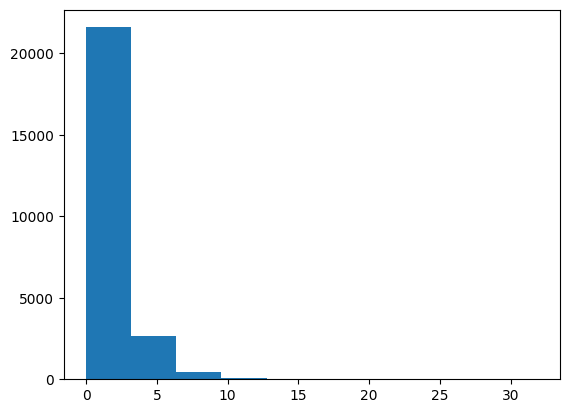

In [ ]:
plt.hist(tweet_scores)
plt.show()

In [ ]:
tweetdf['tweet_scores'] = tweet_scores
tweetdf

,class,tweet,tweet_scores,hatefulness,tweet_number
0,False,!!! RT @mayasolovely: As a woman you shouldn't...,0.000000,non-hateful,0
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1.933863,hateful,1
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,6.614097,hateful,3
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1.496118,hateful,1
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,5.579079,hateful,3
...,...,...,...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0.000000,non-hateful,0
24779,False,"you've gone and broke the wrong heart baby, an...",2.800699,hateful,1
24780,True,young buck wanna eat!!.. dat nigguh like I ain...,0.000000,non-hateful,0
24781,True,youu got wild bitches tellin you lies,0.000000,non-hateful,0


In [ ]:
tweetdf['tweet_number'] = tweet_number
tweetdf

,class,tweet,tweet_scores,hatefulness,tweet_number
0,False,!!! RT @mayasolovely: As a woman you shouldn't...,0.000000,non-hateful,0
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1.933863,hateful,1
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,6.614097,hateful,3
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1.496118,hateful,1
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,5.579079,hateful,3
...,...,...,...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0.000000,non-hateful,0
24779,False,"you've gone and broke the wrong heart baby, an...",2.800699,hateful,1
24780,True,young buck wanna eat!!.. dat nigguh like I ain...,0.000000,non-hateful,0
24781,True,youu got wild bitches tellin you lies,0.000000,non-hateful,0


In [ ]:
tweetdf['hatefulness'] = np.where(tweetdf['tweet_number']>0, 'hateful', 'non-hateful')
tweetdf

,class,tweet,tweet_scores,hatefulness,tweet_number
0,False,!!! RT @mayasolovely: As a woman you shouldn't...,0.000000,non-hateful,0
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1.933863,hateful,1
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,6.614097,hateful,3
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1.496118,hateful,1
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,5.579079,hateful,3
...,...,...,...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0.000000,non-hateful,0
24779,False,"you've gone and broke the wrong heart baby, an...",2.800699,hateful,1
24780,True,young buck wanna eat!!.. dat nigguh like I ain...,0.000000,non-hateful,0
24781,True,youu got wild bitches tellin you lies,0.000000,non-hateful,0


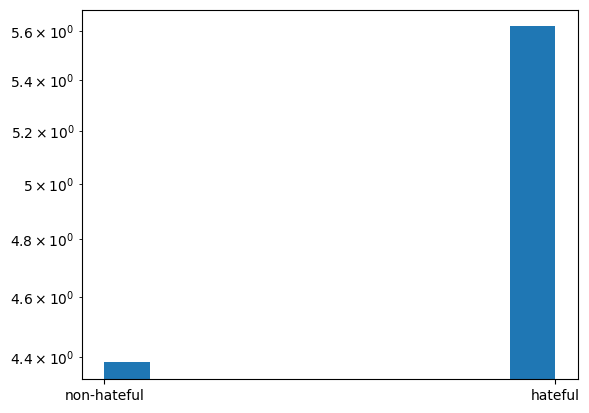

In [ ]:
plt.hist(tweetdf['hatefulness'], 10, density=True)
plt.yscale('log')
plt.show()

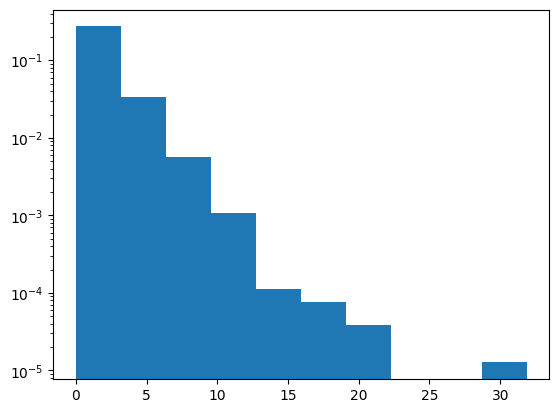

In [ ]:
plt.hist(tweetdf['tweet_scores'], 10, density=True)
plt.yscale('log')
plt.show()

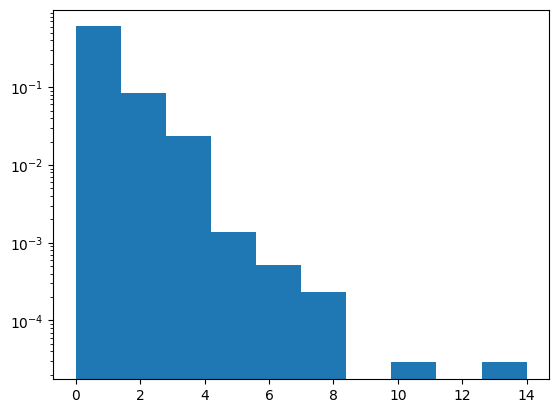

In [ ]:
plt.hist(tweetdf['tweet_number'], 10, density=True)
plt.yscale('log')
plt.show()